In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import numpy as np

In [0]:
dataset = tfds.load(name="cats_vs_dogs", split=tfds.Split.TRAIN, as_supervised=True)

IMG_SIZE = 96
num_epochs = 5
dataset = dataset.map(lambda img, label: (tf.image.resize(img, [IMG_SIZE, IMG_SIZE]) / 255.0, label)).shuffle(12500).batch(32)

In [0]:
def train():   
    return model.fit(dataset, epochs=num_epochs, verbose=1)


hub_model = hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_050_96/classification/4', input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = keras.Sequential([
    hub_model,
    tf.keras.layers.Dense(2, tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.sparse_categorical_crossentropy,
                    metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [50]:
history = train()

Epoch 1/5
727/727 [==============================] - 132s 181ms/step - loss: 0.2021 - sparse_categorical_accuracy: 0.9216
Epoch 2/5
727/727 [==============================] - 127s 175ms/step - loss: 0.1569 - sparse_categorical_accuracy: 0.9405
Epoch 3/5
727/727 [==============================] - 127s 175ms/step - loss: 0.1540 - sparse_categorical_accuracy: 0.9396
Epoch 4/5
727/727 [==============================] - 126s 173ms/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9418
Epoch 5/5
727/727 [==============================] - 127s 174ms/step - loss: 0.1452 - sparse_categorical_accuracy: 0.9424


<Figure size 432x288 with 0 Axes>

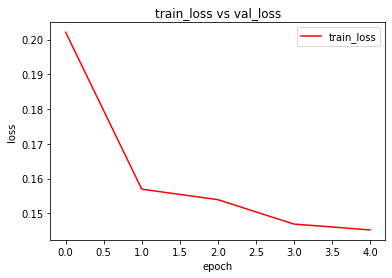

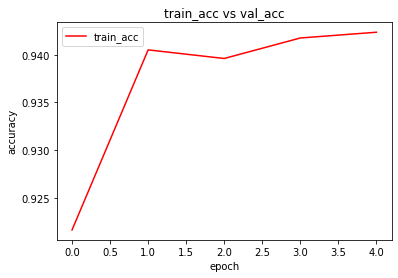

<Figure size 432x288 with 0 Axes>

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

train_loss=history.history['loss']
#val_loss=history.history['val_loss']
train_acc=history.history['sparse_categorical_accuracy']
#val_acc=history.history['val_sparse_categorical_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
#plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
#plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()